## Digit Recognizer

*In this Notebook we work on the famous **MNIST dataset** which is the de facto “hello world” dataset of computer vision. We build our first neural network  with **Pytorch** package and learn the accuracy and loss with tuning the hyperparameters*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import torch


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [4]:
train_df = reduce_memory_usage(train)
test_df = reduce_memory_usage(test)

Mem. usage decreased to 58.32 Mb (76.8% reduction)
Mem. usage decreased to 38.59 Mb (77.0% reduction)


*We take a look at how a digit looks from the pixels of the dataset using the plt.imshow() function as shown below*

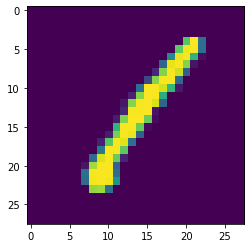

In [6]:
%matplotlib inline
plt.imshow(np.array(train[:2])[0][1:].reshape(28,28))
#cv2.waitKey(0) 
  
#closing all open windows 
#cv2.destroyAllWindows() 

In [28]:
y = train["label"]
X = train.copy()
X.pop('label')
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y = train_df.label.values
X = train_df.loc[:,train_df.columns != "label"].values/255

In [30]:
from sklearn.model_selection import train_test_split
train_X, test_X,train_y , test_y = train_test_split(X,y,test_size=0.2, random_state=42)

*Neural Network is built inheriting nn.Module() class and adding our own layers as shown below*

In [31]:
class digit_recog(nn.Module):
    
    def __init__(self,input_dim,  output_dim):
        super(digit_recog,self).__init__()
        
        self.l1 = nn.Linear(input_dim, 200)
        self.act1 = nn.ReLU()
        
        self.l2 = nn.Linear(200, 150)
        self.act2 = nn.ReLU()
        
        self.l3 = nn.Linear(150, 100)
        self.act3 = nn.ReLU()
        
        self.l4 = nn.Linear(100, output_dim)
        
    def forward(self, x):
        
        #Linearity 1
        out = self.l1(x)
        # Non-linearity 1
        out = self.act1(out)
        
        #Linearity 2
        out = self.l2(out)
        # Non-linearity 2
        out = self.act2(out)
        
        # Linear function 2
        out = self.l3(out)
        # Non-linearity 2
        out = self.act3(out)
        
        # Linear function 4 (readout)
        out = self.l4(out)
        return out

In [32]:
model = digit_recog(28*28,10)

#error is instatitated
error = nn.CrossEntropyLoss()

#learning rate and optimizer is instatiated
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)


*the datasets are converted to tensors to enable them to pass it to our model*

In [33]:
train_X  = torch.from_numpy(train_X).type(torch.float)
train_y = torch.from_numpy(train_y).type(torch.LongTensor)

test_X  = torch.from_numpy(test_X).type(torch.float)
test_y = torch.from_numpy(test_y).type(torch.LongTensor)

from torch.utils.data import TensorDataset

train = TensorDataset(train_X,train_y)
test = TensorDataset(test_X,test_y)


In [34]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(train_X) / batch_size)
num_epochs = int(num_epochs)

from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

In [35]:
from torch.autograd import Variable

count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Calculate softmax and cross entropy loss
        outputs = model(train)
        loss = error(outputs,labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                 
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 2.245980978012085  Accuracy: 39.2023811340332%
Iteration: 1000  Loss: 1.7684239149093628  Accuracy: 58.10714340209961%
Iteration: 1500  Loss: 0.7098845839500427  Accuracy: 77.57142639160156%
Iteration: 2000  Loss: 0.5582727193832397  Accuracy: 84.8452377319336%
Iteration: 2500  Loss: 0.41927433013916016  Accuracy: 87.4047622680664%
Iteration: 3000  Loss: 0.22811128199100494  Accuracy: 88.5952377319336%
Iteration: 3500  Loss: 0.3786190152168274  Accuracy: 89.30952453613281%
Iteration: 4000  Loss: 0.14596505463123322  Accuracy: 90.01190185546875%
Iteration: 4500  Loss: 0.5276183485984802  Accuracy: 90.48809814453125%
Iteration: 5000  Loss: 0.2200319468975067  Accuracy: 90.35713958740234%
Iteration: 5500  Loss: 0.27373257279396057  Accuracy: 91.13095092773438%
Iteration: 6000  Loss: 0.4092268645763397  Accuracy: 91.38095092773438%
Iteration: 6500  Loss: 0.17057643830776215  Accuracy: 92.36904907226562%
Iteration: 7000  Loss: 0.31464651226997375  Accuracy: 92.66666412

In [36]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
test_df_X = test_df.loc[:,test_df.columns != "label"].values/255
test_df_X  = torch.from_numpy(test_df_X).type(torch.float)

In [81]:
outputs_df = model(test_df_X) 

In [87]:
predicted_df = torch.max(outputs_df.data, 1)[1]

In [88]:
predicted_df

tensor([2, 0, 9,  ..., 3, 9, 2])

In [99]:
ImageId = np.array(range(1,28001))

In [100]:
a = np.column_stack([ImageId.astype(np.int32),predicted_df])
df_csv = pd.DataFrame(a,columns=['ImageId','label'])
df_csv["ImageId"] = df_csv["ImageId"].astype(int)
df_csv.to_csv('digit_recog.csv',index=False)

*After submittting our file to the Kaggle Website we got a score of 0.94007*